<a href="https://colab.research.google.com/github/hadiabrishami76/Hadi-Abrishami-proj-1/blob/main/Abrishami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install nltk
!pip install hazm
!pip install stopwords_guilannlp

     |████████████████████████████████| 317kB 12.5MB/s 
     |████████████████████████████████| 235kB 35.6MB/s 
     |████████████████████████████████| 1.4MB 13.6MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154546 sha256=67ffbdf549345b51e8a6a416f638ac059485c0d0f1eed5d428beb3992ff4a4b2
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394471 sha256=5f707bf940851e41f962fef65ec9a9be8640f01ab18f5d5258b91cfe8ce60c55
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


# New Section

# New Section

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
from hazm import *
from stopwords_guilannlp import *
from nltk.tokenize import RegexpTokenizer
import numpy as np
import math
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
from string import punctuation
import random
import tensorflow as tf
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# The maximum number of words to be used. (most frequent)
vocab_size = 50000

# Dimension of the dense embedding.
embedding_dim = 128

# Max number of words in each complaint.
max_length = 200

# Truncate and padding options
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
import pandas as pd
df=pd.read_excel("/content/Records_Com&Emo.xlsx")
df=df[['comment','Label']]

In [ ]:
original_text = df["comment"].to_list()[:30]

In [ ]:
df.head(3)

,comment,Label
0,جادار و زیبا (مخصوصا برای افرادی که چای یا ما...,U0001F635
1,به سلیقه من خوشگل و زیباست ، کار را اندازه .,U0001F60A
2,بهترین اسپیکر تو این رنج قیمت همینه\nچهار تا ت...,U0001F917


In [ ]:
# Lets do some text cleanup


#for faster result, we define the following lines of code outside the 'preprocessing' function
normalizer = Normalizer()
stopwords = stopwords_output("Persian", "nar")
lemmatizer = Lemmatizer()
stemmer = Stemmer()
#--------------------------------
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = stopwords

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    text = ''.join(c for c in text if c not in punctuation)
    text = normalizer.normalize(text)

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [ ]:
df["comment"] = df["comment"].apply(clean_text)

# Shuffel the dataset to make sure we get an equal distribution of the data before splitting into train and test sets
df = df.sample(frac=1)

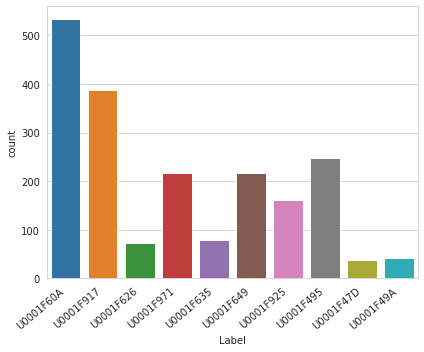

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

اسامی ایموجی خودتان را وارد کنید :

In [ ]:
emoji=pd.read_csv('/content/Emoji_Label12000.csv')

FileNotFoundError: ignored

In [ ]:
emoj=emoji.Code

In [ ]:
emoj

In [ ]:
i=0
while i < len(df):

  if df['Label'][i]==emoj[0]:
    df['Label'][i]=1
  if df['Label'][i]==emoj[1]:
    df['Label'][i]=2
  if df['Label'][i]==emoj[2]:
    df['Label'][i]=3
  if df['Label'][i]==emoj[3]:
    df['Label'][i]=4
  if df['Label'][i]==emoj[4]:
    df['Label'][i]=5
  if df['Label'][i]==emoj[5]:
    df['Label'][i]=6
  if df['Label'][i]==emoj[6]:
    df['Label'][i]=7  
  if df['Label'][i]==emoj[7]:
    df['Label'][i]=8
  if df['Label'][i]==emoj[8]:
    df['Label'][i]=9
  if df['Label'][i]==emoj[9]:
    df['Label'][i]=10

  i+=1
#------------------------------------------------------------
sns.set_style('whitegrid')
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
complaints =df['comment'].values
labels = df['Label'].values
X_train, y_train, X_test, y_test = train_test_split(complaints,labels, test_size = 0.20, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
dict(list(word_index.items())[0:10])

"""
Found 5047 unique tokens.
{'<OOV>': 1,
 'account': 2,
 'call': 7,
 'credit': 3,
 'debt': 9,
 'inform': 8,
 'loan': 6,
 'payment': 5,
 'receiv': 10,
 'report': 4}
"""

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_seq = tokenizer.texts_to_sequences(y_train)
validation_padded = pad_sequences(validation_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Shape of data tensor:', train_padded.shape)
print('Shape of data tensor:', validation_padded.shape)

In [ ]:
encode = OneHotEncoder()
X_test = X_test.reshape(len(X_test), 1)
y_test = y_test.reshape(len(y_test), 1)
training_labels = encode.fit_transform(X_test)
validation_labels = encode.transform(y_test)

In [ ]:
print(train_padded.shape)
print(validation_labels.shape)
print(validation_padded.shape)
print(training_labels.shape)
print(type(train_padded))
print(type(validation_padded))
print(type(training_labels))
print(type(validation_labels))

In [ ]:
# The labels must be converted to arrays
# Convert the labels to arrays
training_labels = training_labels.toarray()
validation_labels = validation_labels.toarray()

print(type(training_labels))
print(type(validation_labels))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))

model.add(Conv1D(48, 10, activation='relu', padding='valid'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 32

history = model.fit(train_padded, training_labels, shuffle=True ,
                    epochs=epochs, batch_size=batch_size, 
                    validation_split=0.2,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001), 
                               EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1),
                               EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)])

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# First we create an evaluation function to output all the needs metrics

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [ ]:
# Now we make predictions using the test data to see how the model performs

predicted = model.predict(validation_padded)
evaluate_preds(np.argmax(validation_labels, axis=1), np.argmax(predicted, axis=1))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import sklearn.metrics as metrics

In [ ]:
target_names=['1','2','3','4','5','6','7','8','9','10']
print(classification_report(np.argmax(validation_labels,axis=1),  np.argmax(predicted, axis=1),target_names=target_names))

In [ ]:
conf_mat = confusion_matrix(np.argmax(validation_labels, axis=1), np.argmax(predicted, axis=1))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df.Label.unique(), yticklabels=df.Label.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Test Model

complaint = original_text[18]
new_complaint = [clean_text(complaint)]
print(complaint)
print(new_complaint)
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
acc = model.predict_proba(padded)
predicted_label = encode.inverse_transform(pred)
print('')
print(f'Product category id: {np.argmax(pred[0])}')
print(f'Predicted label is: {predicted_label[0]}')
print(f'Accuracy score: { acc.max() * 100}')